## T-SNE analysis btw assays and tissues
Do I see clustering between tissues or clustering within projects? If there is more clear clustering between projects this might mean I have some severe batch effects!

In [2]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 22.2 MB 8.3 MB/s            
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=c2b9f82daa20428c4af4b47413656e49d38b4abfd175c1bd9e5bdddfd1542c71
  Stored in directory: /home/compomics/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import mysql.connector

In [4]:
conn = mysql.connector.connect(user='root', password='password', host='127.0.0.1', port='3306',
                               database='expression_atlas_cells2', auth_plugin='mysql_native_password')
mycursor = conn.cursor()

# check the connection
if conn.is_connected():
    print("connection succesfull")
else:
    print("no connection")


connection succesfull


We need the normal tissue predictor atlas but we need to add the original project_id

In [5]:
proteinData = pd.read_csv('/home/compomics/Sam/git/python/Sam/Atlas_creation/proteome_nsaf_tine.csv')
proteinData.head()

,assay_id,uniprot_id,NSAF
0,1,A0A1B0GUS4,0.001458
1,1,A0AVT1,0.000213
2,1,A6NDG6,0.001049
3,1,A6NHL2,0.000503
4,1,A6NHQ2,0.000336


In [6]:
cellsql = """SELECT cell_to_assay.assay_id, cell.cell_line, cell.treated
             FROM cell_to_assay JOIN cell ON cell_to_assay.cell_id = cell.cell_id"""
cellData = pd.read_sql_query(cellsql,conn)
cellData.head()

,assay_id,cell_line,treated
0,1,HL60,ATRA
1,2,HL60,ATRA
2,3,HL60,ATRA
3,4,HL60,ATRA
4,5,HL60,ATRA


In [7]:
cellData.shape

(1976, 3)

In [8]:
project_assay_sql = """SELECT assay.assay_id, assay.project_id FROM assay"""
project_assay_Data = pd.read_sql_query(project_assay_sql,conn)
project_assay_Data.head()

,assay_id,project_id
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [9]:
cellData = pd.merge(cellData, project_assay_Data, on='assay_id', how='left')
cellData.shape

(1976, 4)

In [10]:
cellData

,assay_id,cell_line,treated,project_id
0,1,HL60,ATRA,1
1,2,HL60,ATRA,1
2,3,HL60,ATRA,1
3,4,HL60,ATRA,1
4,5,HL60,ATRA,1
...,...,...,...,...
1971,1971,A431,"DON (Deoxynivalenol, vomitoxin)",4
1972,1973,A431,"DON (Deoxynivalenol, vomitoxin)",4
1973,1974,A431,"DON (Deoxynivalenol, vomitoxin)",4
1974,1975,A431,"DON (Deoxynivalenol, vomitoxin)",4


In [11]:
assay_atlas = pd.pivot_table(proteinData, values = 'NSAF', index = 'assay_id', columns = 'uniprot_id').fillna(0).reset_index()
assay_atlas.head(15)
#assay_atlas

uniprot_id,assay_id,A0A0B4J2F0,A0A1B0GUS4,A0A1W2PRP0,A0AUZ9,A0AVK6,A0AVT1,A0JNW5,A0MZ66,A0PJW6,...,Q9Y6W3,Q9Y6W5,Q9Y6X0,Q9Y6X3,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y1,Q9Y6Y8
0,1,0.0,0.001458,0.0,0.0,0.0,0.000213,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.000714,0.0,0.0,0.0,0.000523,0.000000,0.0,0.0,...,0.0,0.000221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.000718,0.0,0.0,0.0,0.000421,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.000708,0.0,0.0,0.0,0.000415,0.000074,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.000000,0.0,0.0,0.0,0.000410,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0.0,0.000725,0.0,0.0,0.0,0.000212,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0.0,0.000729,0.0,0.0,0.0,0.000427,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0.0,0.000000,0.0,0.0,0.0,0.000322,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,0.0,0.000729,0.0,0.0,0.0,0.000214,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,0.0,0.000000,0.0,0.0,0.0,0.000302,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
atlas = pd.merge(assay_atlas, cellData, on = 'assay_id')
#atlas = atlas_healthy.drop(columns=['assay_id', 'cell_type', 'disease_status'])
#print(atlas.shape)
#atlas

In [18]:
atlas.head(3)

,assay_id,A0A0B4J2F0,A0A1B0GUS4,A0A1W2PRP0,A0AUZ9,A0AVK6,A0AVT1,A0JNW5,A0MZ66,A0PJW6,...,Q9Y6X3,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y1,Q9Y6Y8,cell_line,treated,project_id
0,1,0.0,0.001458,0.0,0.0,0.0,0.000213,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HL60,ATRA,1
1,2,0.0,0.000714,0.0,0.0,0.0,0.000523,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HL60,ATRA,1
2,3,0.0,0.000718,0.0,0.0,0.0,0.000421,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HL60,ATRA,1


In [19]:
atlas.to_csv('tsne_atlas.csv', index=False)

In [16]:
atlas = pd.read_csv('tsne_atlas.csv')

In [20]:
cells = atlas.pop('cell_line')
treatments=atlas.pop('treated')
projects = atlas.pop('project_id')
values = atlas

In [35]:
tsne = TSNE(n_components=2, perplexity=100)
principalComponents = tsne.fit_transform(values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['TSNE_1', 'TSNE_2'])

In [36]:
finalDf = pd.concat([principalDf, cells, treatments, projects], axis = 1)

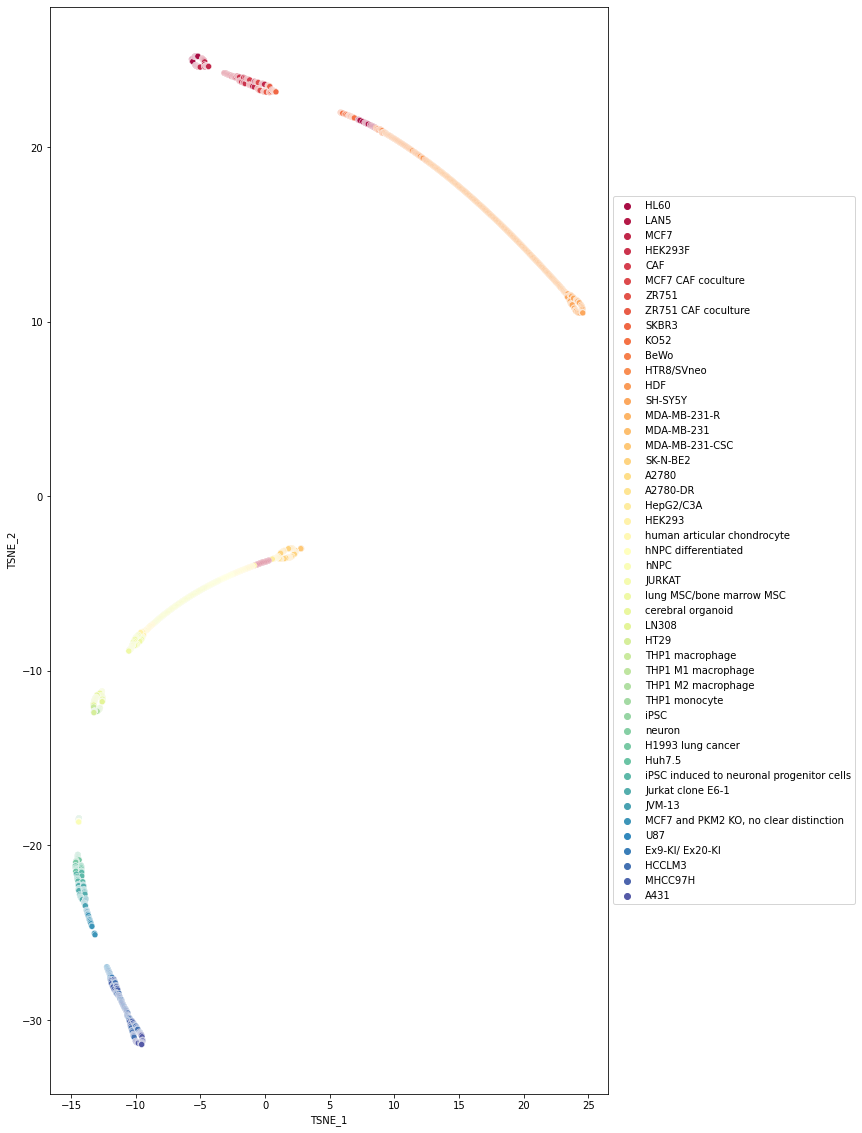

In [38]:
pal = sns.color_palette("Spectral", n_colors=len(np.unique(finalDf['cell_line'])))
fig, ax=plt.subplots(figsize=(10,20))
g = sns.scatterplot(data=finalDf, x='TSNE_1', y='TSNE_2', hue='cell_line', palette=pal)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.figure.savefig('TSNE_assay_tissue_2D.png')

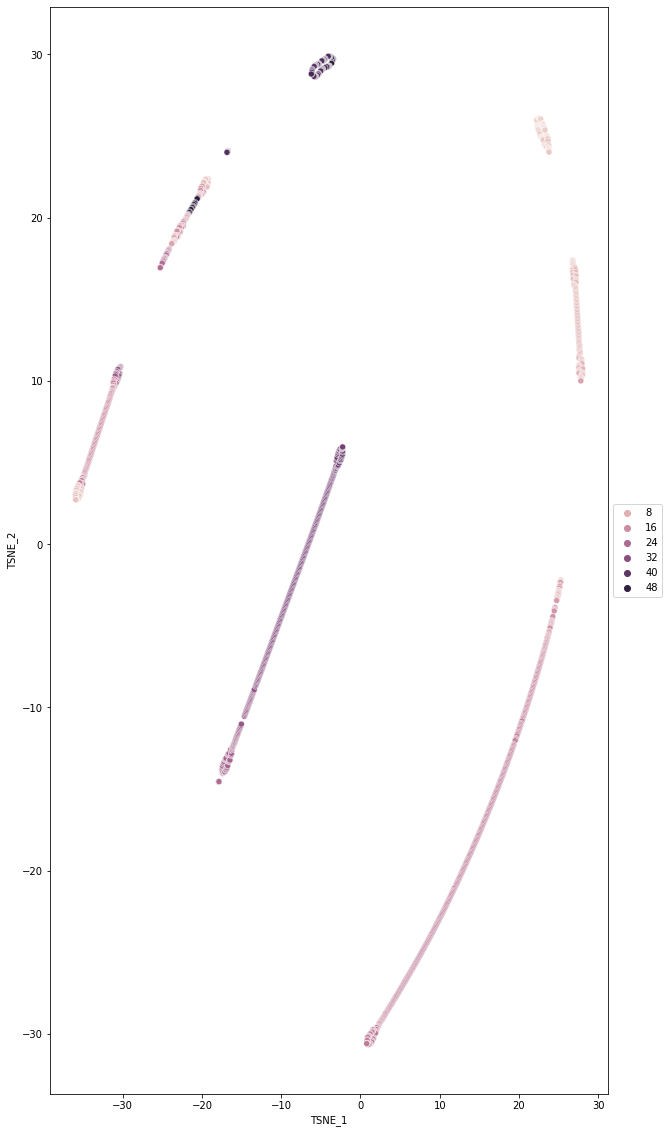

In [26]:
fig, ax=plt.subplots(figsize=(10,20))
g = sns.scatterplot(data=finalDf, x='TSNE_1', y='TSNE_2', hue='project_id')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.figure.savefig('TSNE_assay_project_2D.png')

Plot per tissue and colour per project

/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

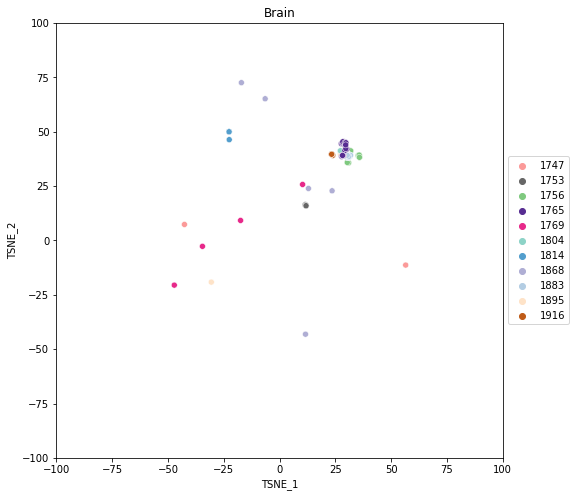

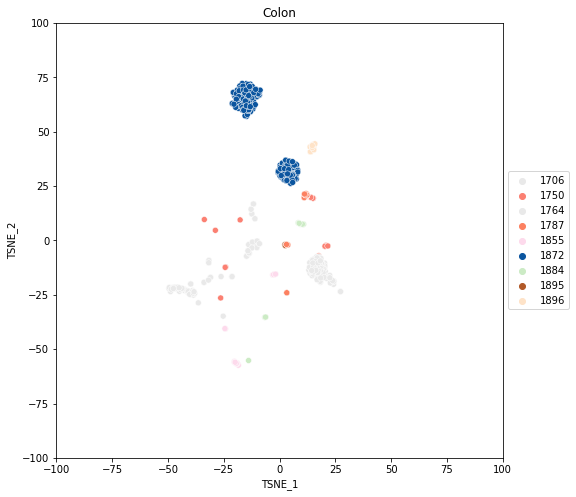

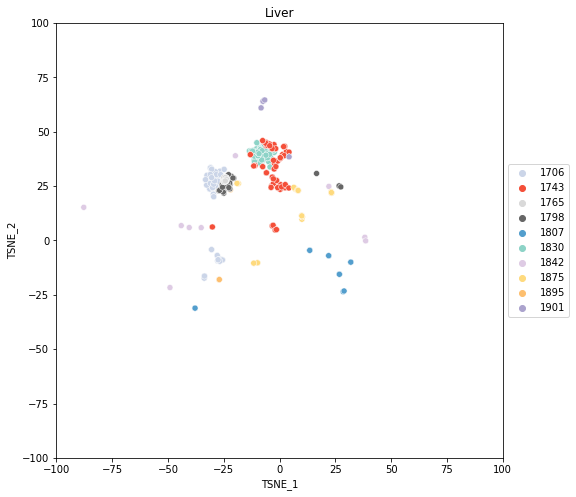

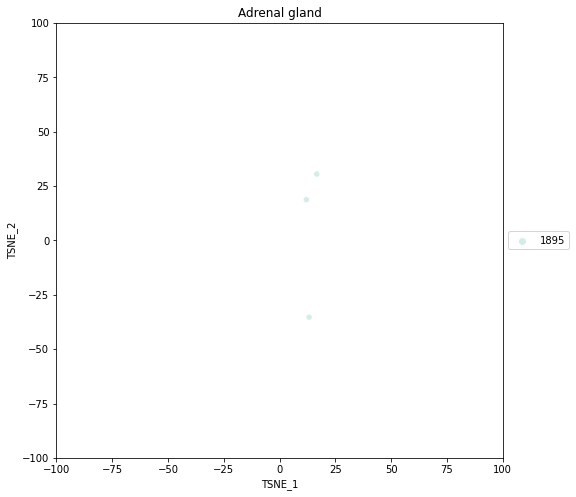

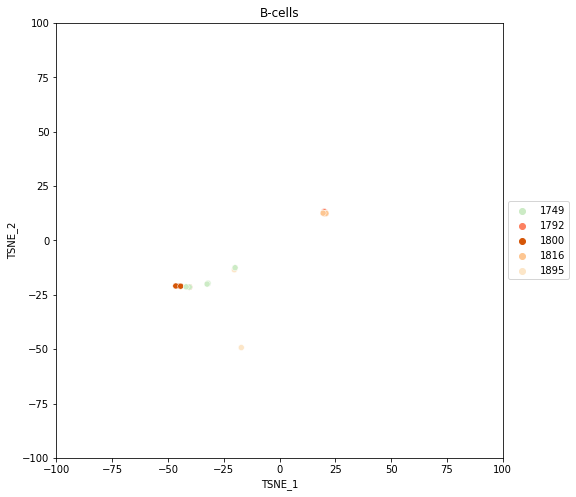

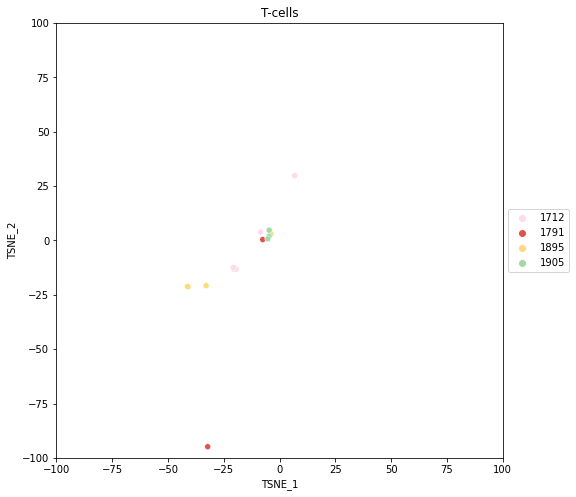

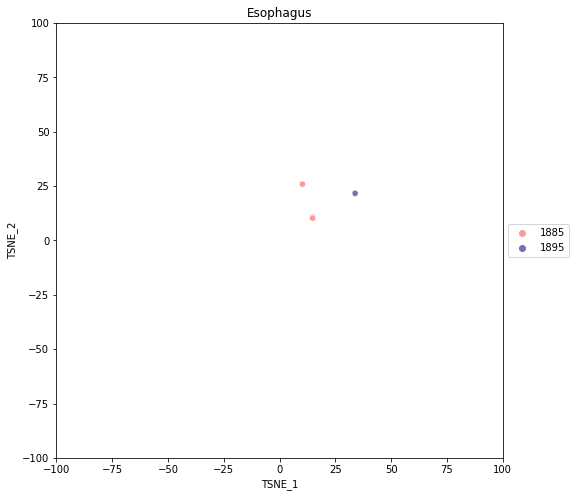

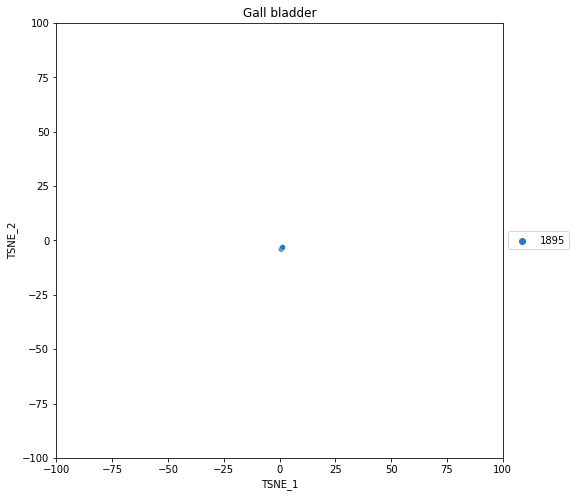

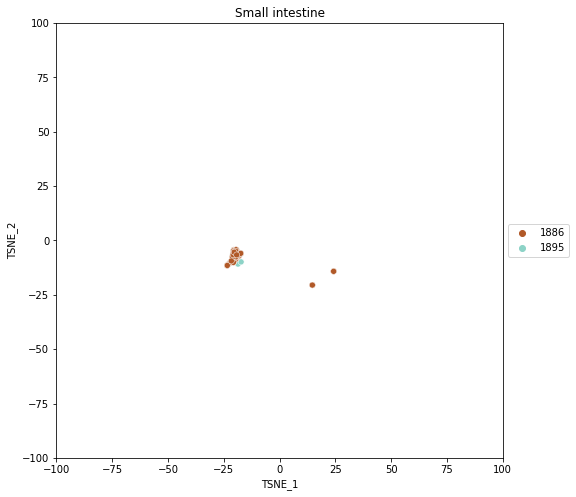

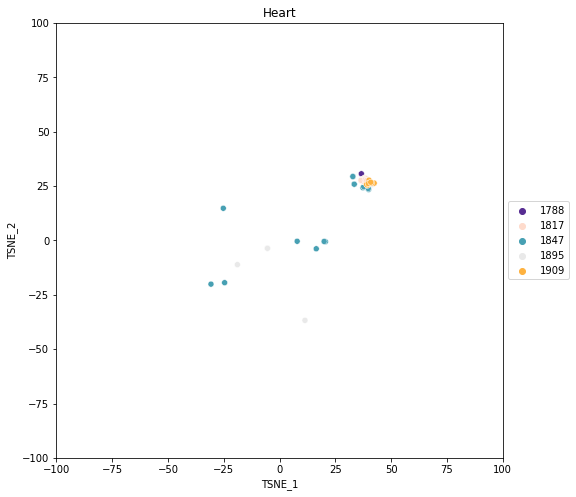

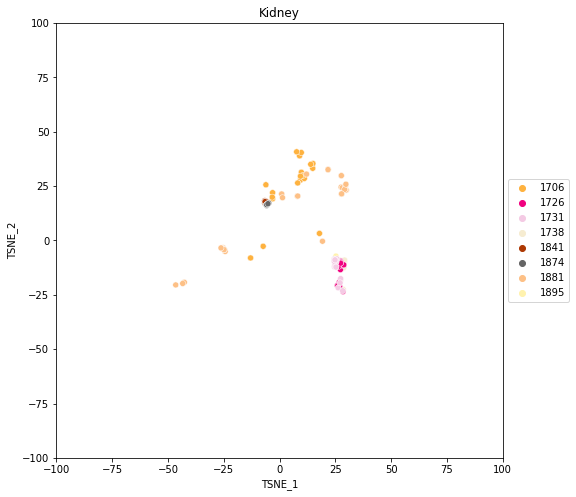

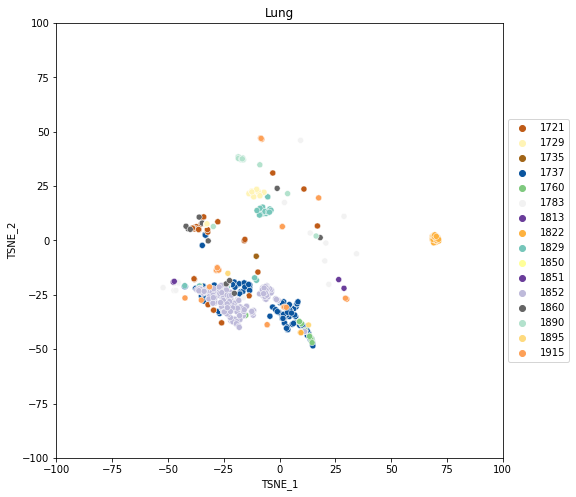

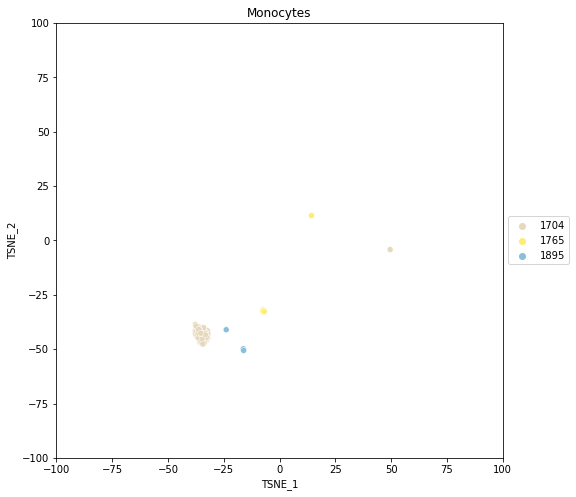

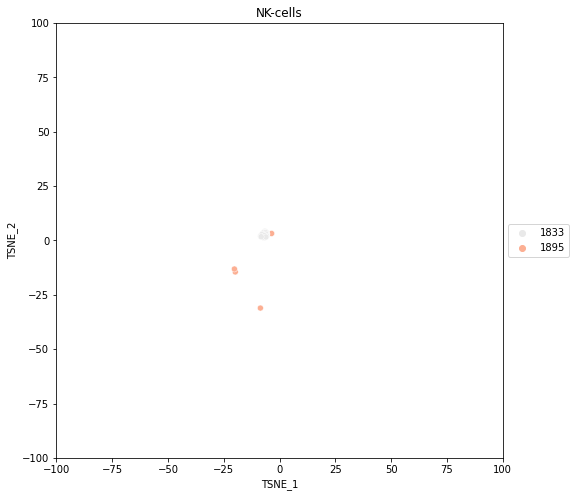

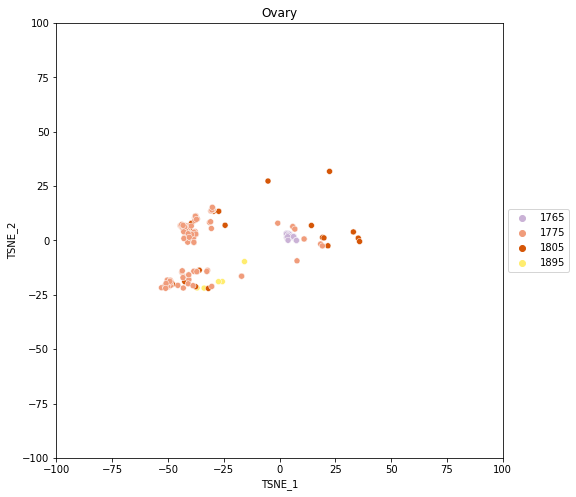

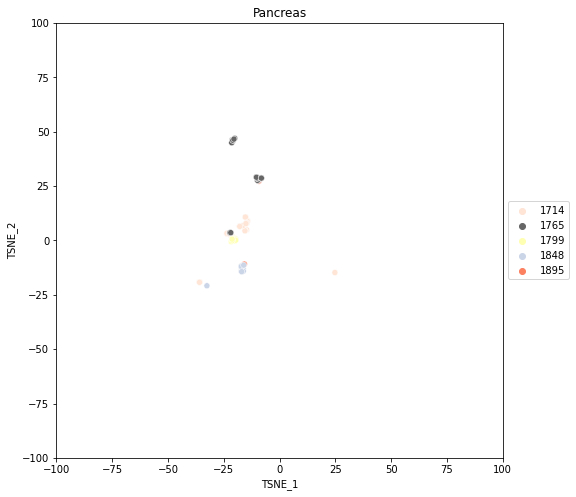

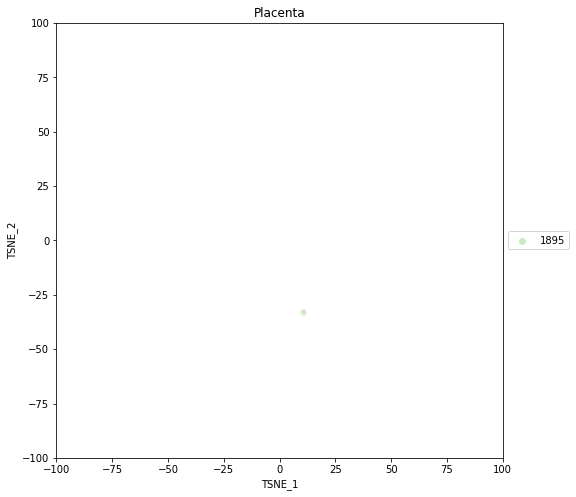

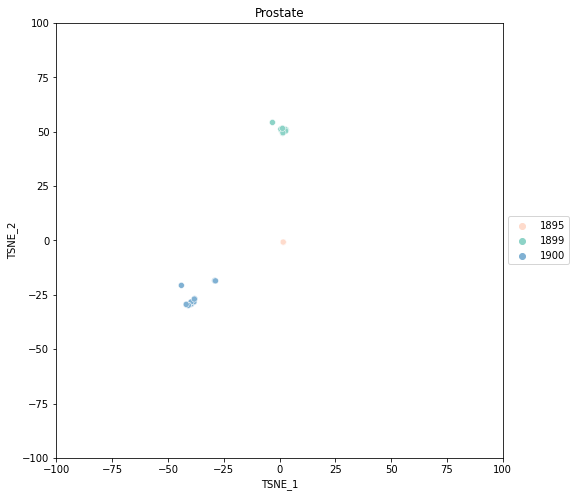

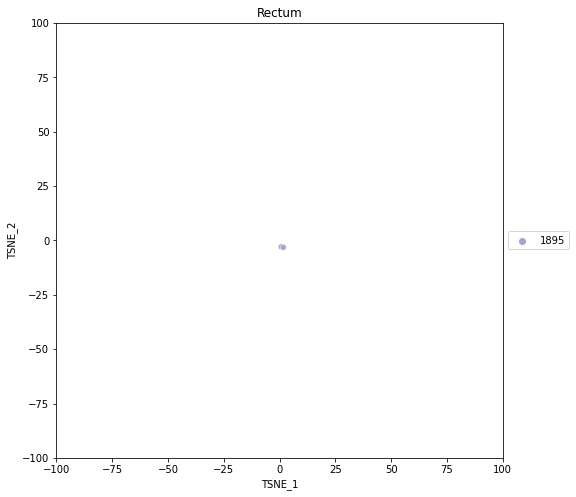

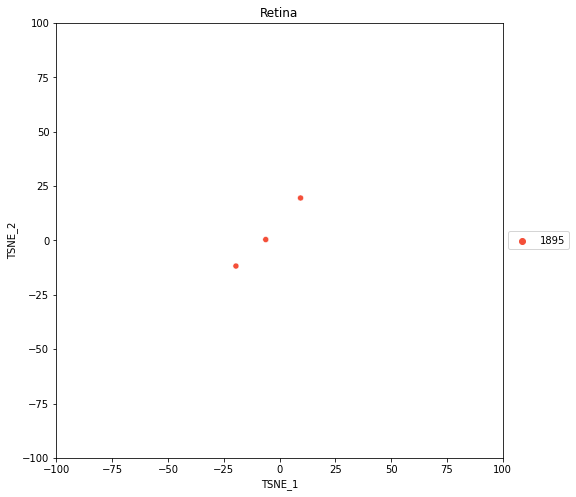

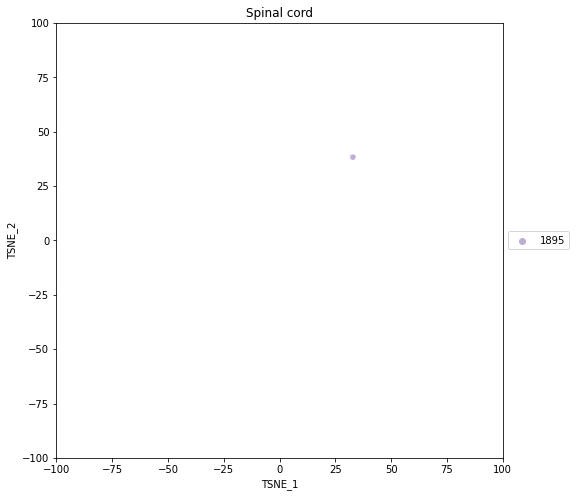

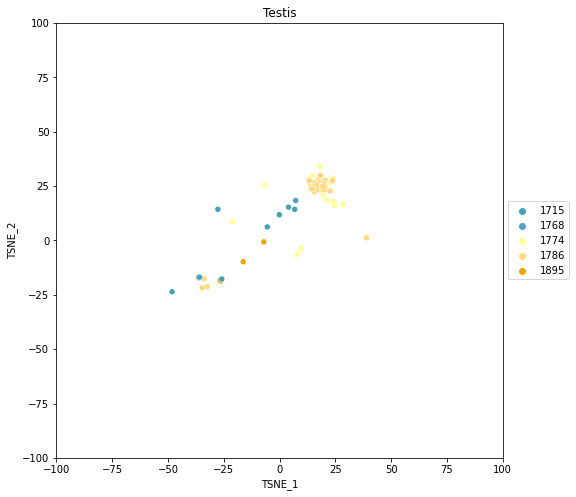

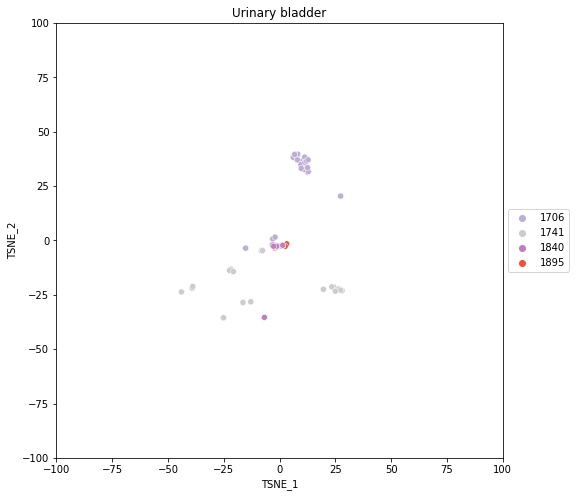

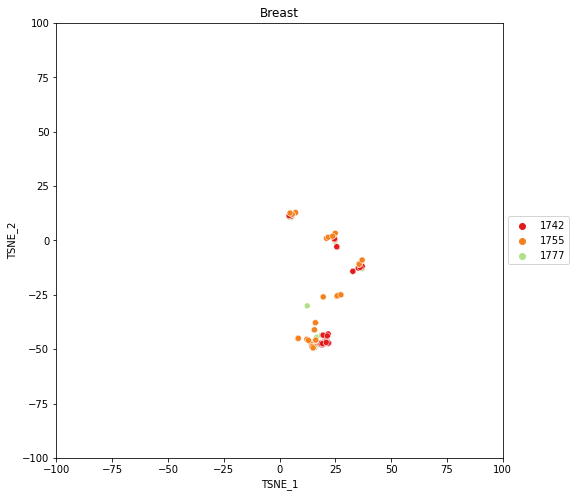

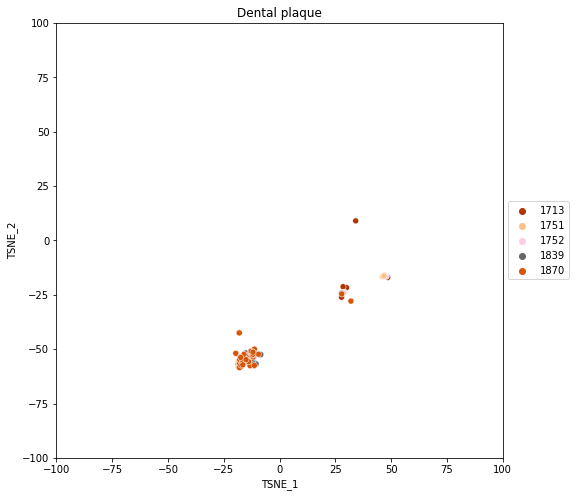

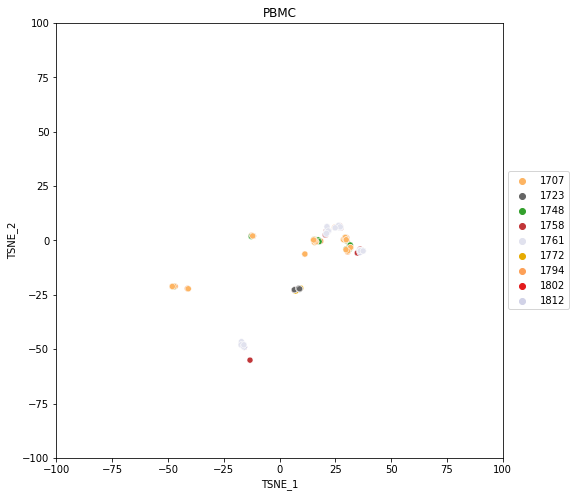

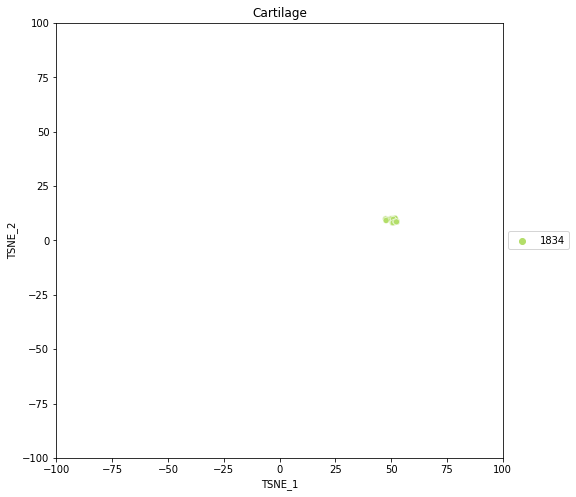

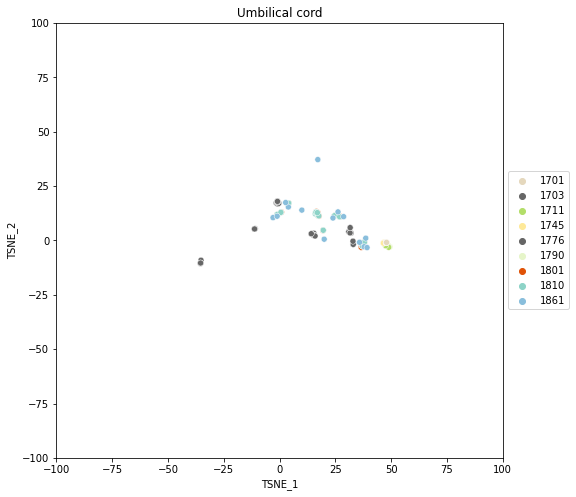

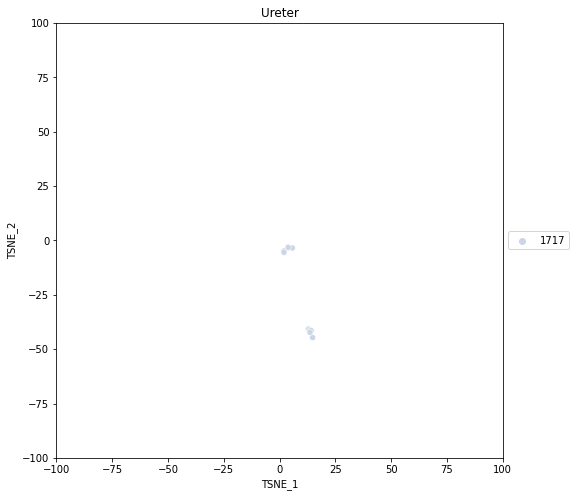

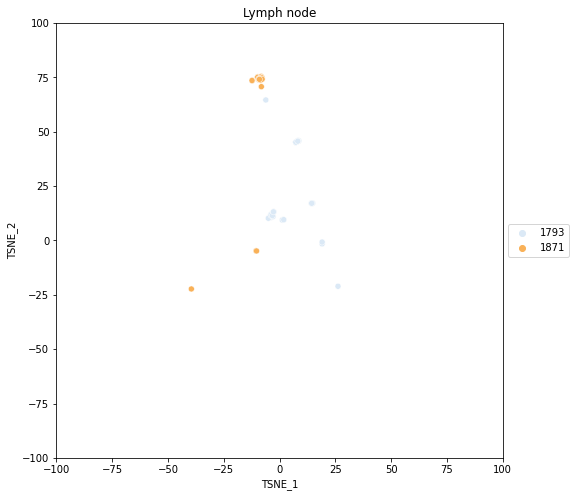

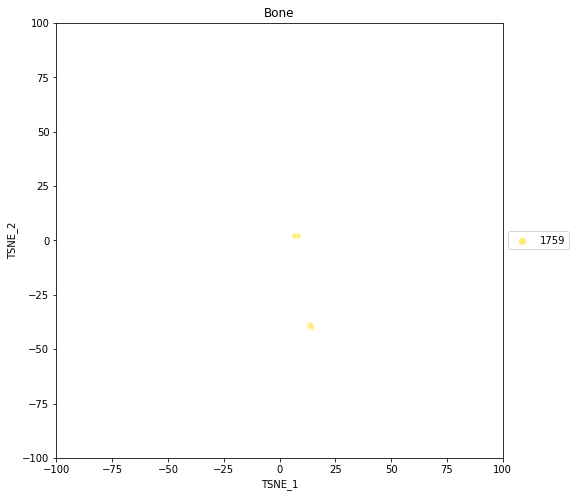

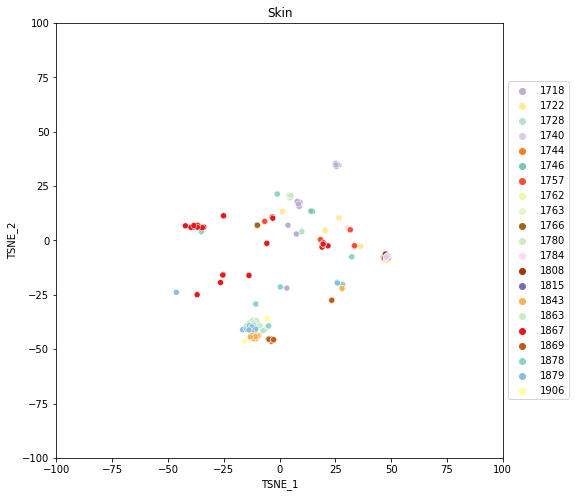

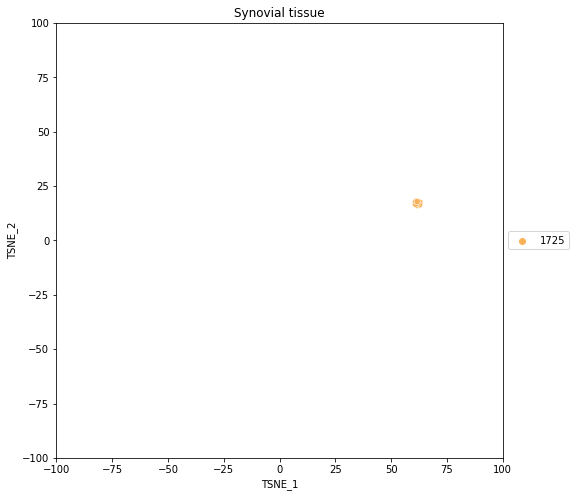

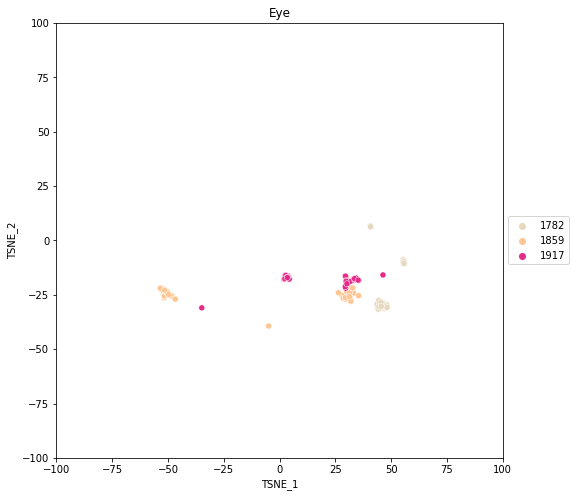

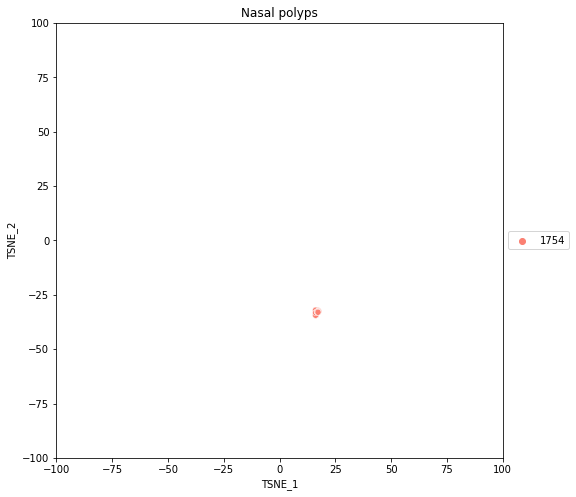

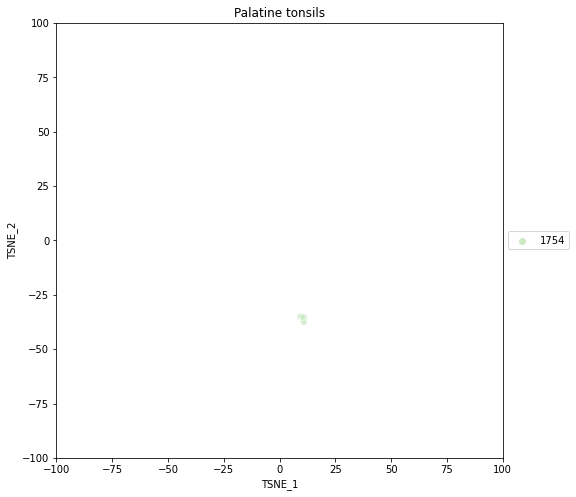

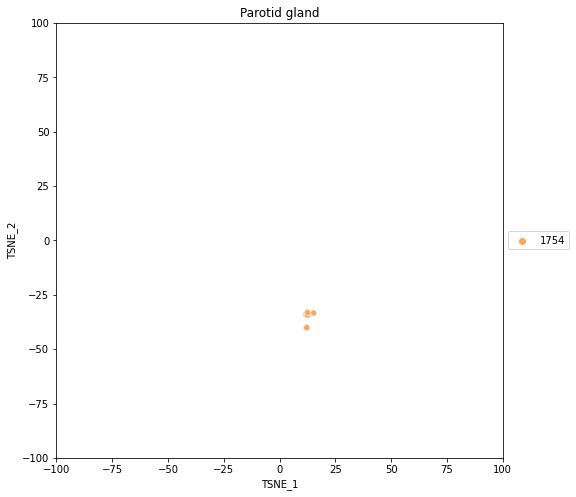

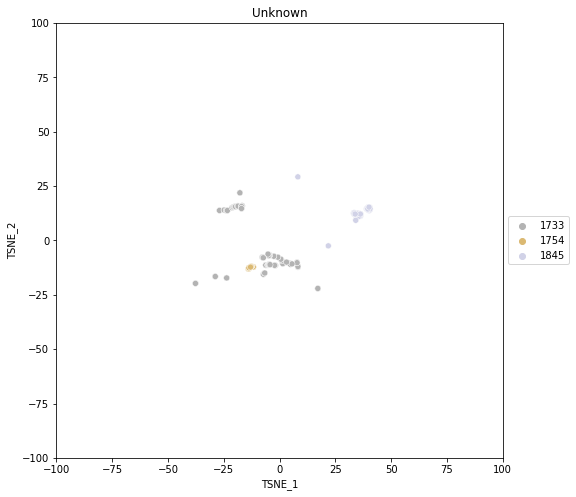

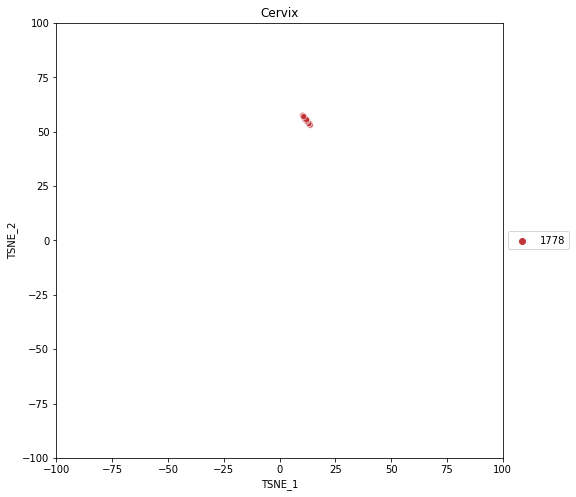

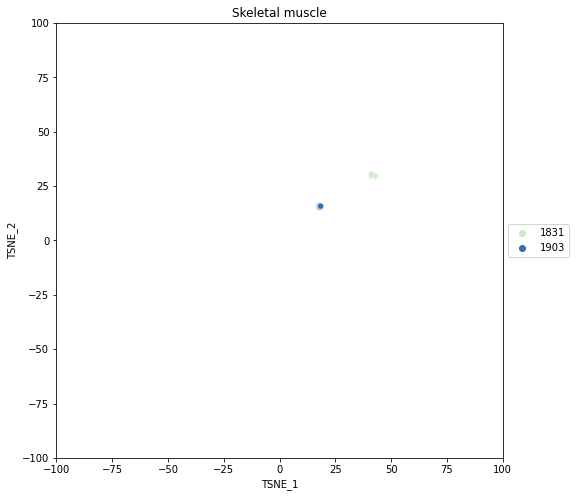

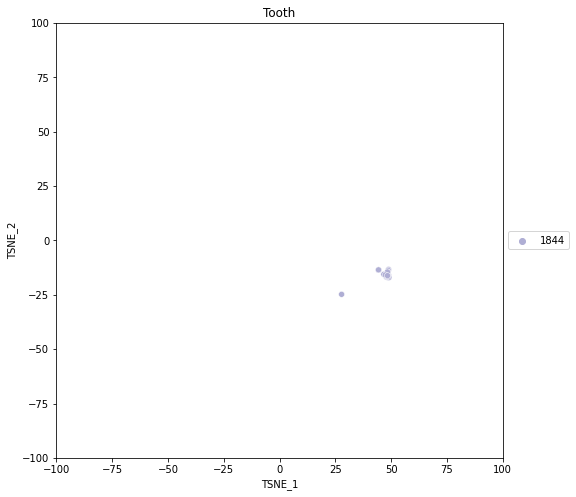

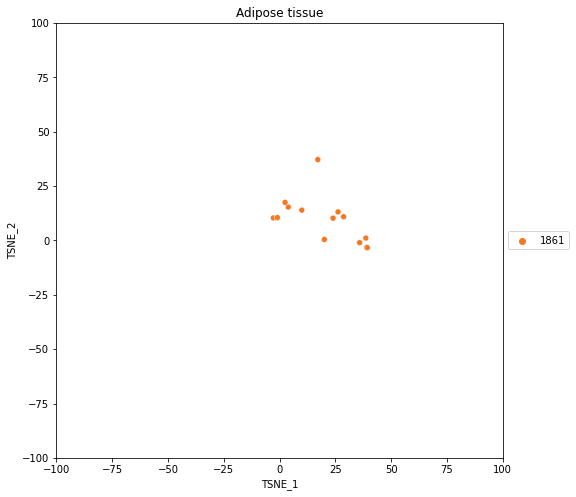

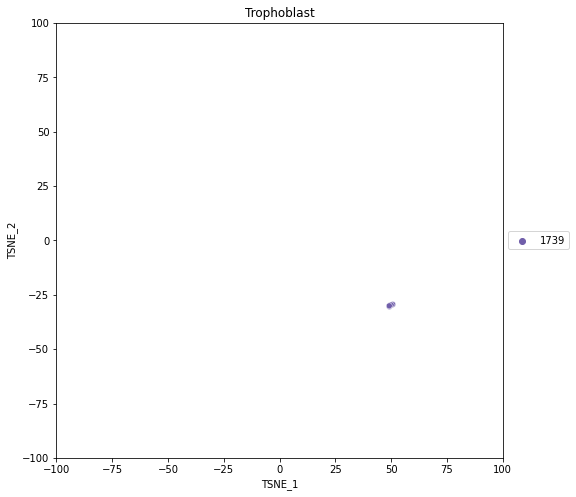

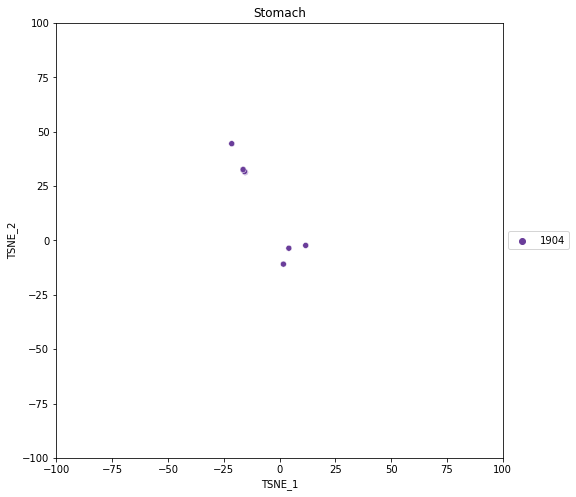

In [28]:
import random
for tissue in finalDf['tissue_name'].unique().tolist():
    finalDf_onetissue = finalDf.loc[finalDf['tissue_name'] == tissue]
    count = len(finalDf_onetissue['project_id'].unique())
    fig, ax=plt.subplots(figsize=(8,8))
    pal = sns.color_palette("Spectral", n_colors=count)
    g = sns.scatterplot(data=finalDf_onetissue, x='TSNE_1', y='TSNE_2', hue='project_id',palette=random.sample(project_colors, count), ax=ax)    
    ax.set_xlim(-100,100)
    ax.set_ylim(-100,100)

    g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    g.set_title(tissue)
    
    if tissue == 'fallopian tube/oviduct':
        tissue = 'Oviduct'
    g.figure.savefig('TSNE_scatterplots/{} TSNE_assay_c.png'.format(tissue))

Clustering between projects and between tissues

In [ ]:
atlas = pd.read_csv('tsne_atlas.csv')

In [ ]:
atlas.head()

In [ ]:
tissues = atlas.pop('tissue_name')
projects = atlas.pop('project_id')
values = atlas

In [ ]:
perplexity_list = [25, 30, 35, 40, 45, 50, 60, 80, 100]
for per in perplexity_list:
    plt.figure()
    tsne = TSNE(n_components=2, perplexity=per)
    principalComponents = tsne.fit_transform(values)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['TSNE_1', 'TSNE_2'])
    finalDf = pd.concat([principalDf, tissues, projects], axis = 1)
    fig, ax=plt.subplots(figsize=(10,20))
    g = sns.scatterplot(data=finalDf, x='TSNE_1', y='TSNE_2', hue='tissue_name', palette=tissue_colors[:-1])
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()